In [1]:
import numpy as np
from scipy import stats

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data: two samplpes from normal distributions
sample1 = np.random.normal(loc=50, scale=5, size=100)
sample2 = np.random.normal(loc=52, scale=5, size=100)

# Perform a two-sample t-test
t_stat, t_p_value = stats.ttest_ind(sample1, sample2)

# Generate synthetic data for chi-square test
observed = np.array([40, 30, 20, 10])
expected = np.array([25, 25, 25, 25])

# Perform a chi-square test
chi2_stat, chi2_p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Print the results
print("Two-sample t-test results:")
print(f"t-statistic: {t_stat:.3f}, p-value: {t_p_value:.3f}")

print("\nChi-square test results:")
print(f"chi2-statistic: {chi2_stat:.3f}, p-value: {chi2_p_value:.3f}")

Two-sample t-test results:
t-statistic: -3.995, p-value: 0.000

Chi-square test results:
chi2-statistic: 20.000, p-value: 0.000


In [3]:
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

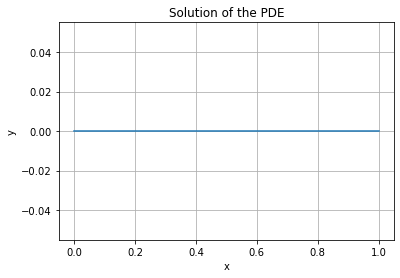

In [4]:
# Define the PDE as a system of first-order ODEs
def pde_system(x, y):
    return np.vstack((y[1], -np.pi**2 * y[0]))

# Define the boundary conditions
def boundary_conditions(ya, yb):
    return np.array([ya[0], yb[0]])

# Create a 2D grid of data points
x = np.linspace(0, 1, 100)
y_initial = np.zeros((2, x.size))

# Solve the boundary value problem (BVP)
solution = solve_bvp(pde_system, boundary_conditions, x, y_initial)

# Plot the solution
plt.plot(solution.x, solution.y[0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the PDE')
plt.grid(True)
plt.show()

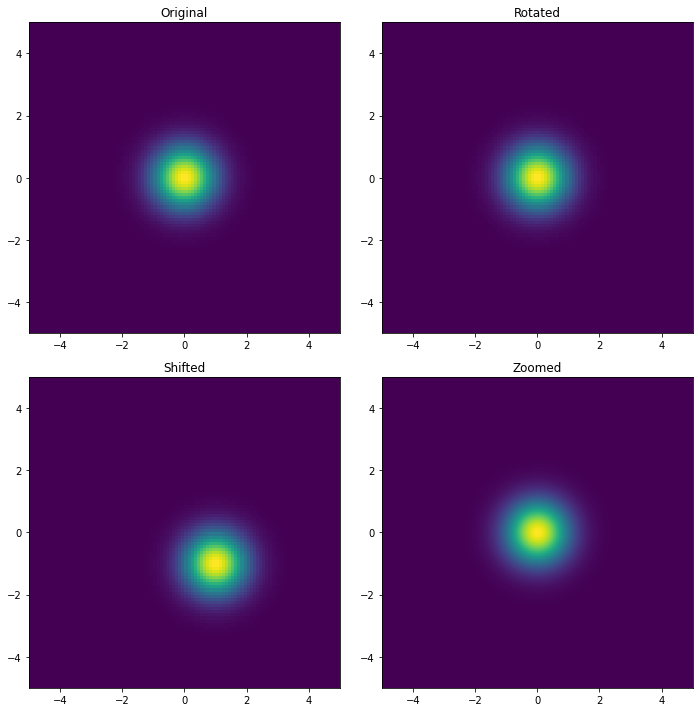

In [5]:
from scipy.ndimage import rotate, shift, zoom

# Generate a synthetic dataset: a 2D Gaussian blob
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.exp(-(x**2 + y**2))

# Perform geometric transformations
# Rotation by 45 degrees
rotated_z = rotate(z, 45, reshape=False)

# Shift by 10 pixels along both axes
shifted_z = shift(z, shift=[10, 10])

# Zoom by a factor of 2
zoomed_z = zoom(z, zoom=2)

# Plot the original and transformed datasets
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original dataset
axs[0, 0].imshow(z, extent=[-5, 5, -5, 5])
axs[0, 0].set_title('Original')

# Rotated dataset
axs[0, 1].imshow(rotated_z, extent=[-5, 5, -5, 5])
axs[0, 1].set_title('Rotated')

# Shifted dataset
axs[1, 0].imshow(shifted_z, extent=[-5, 5, -5, 5])
axs[1, 0].set_title('Shifted')

# Zoomed dataset
axs[1, 1].imshow(zoomed_z, extent=[-5, 5, -5, 5])
axs[1, 1].set_title('Zoomed')

plt.tight_layout()
plt.show()

In [6]:
from scipy.optimize import minimize

Estimated mean (mu): 5.039
Estimated standard deviation (sigma): 1.957


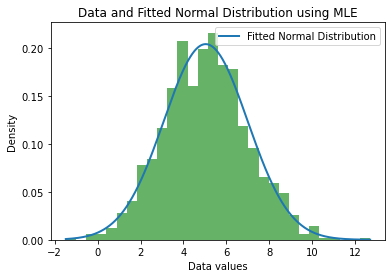

In [11]:
# Generate synthetic data: sample from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=5.0, scale=2.0, size=1000)

# Define the negative log-likelihood function for a normal distribution
def neg_log_likelihood(params):
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    nll = -np.sum(np.log(1/(np.sqrt(2 * np.pi) * sigma) * np.exp(-(data - mu)**2 / (2 * sigma**2))))
    return nll

# Initial guess for the parameters (mean and standard deviation)
initial_params = np.array([0.0, 1.0])

# Perform MLE using SciPy's minimize function
result = minimize(neg_log_likelihood, initial_params, method='L-BFGS-B', bounds=[(None, None), (1e-5, None)])

# Extract the estimated parameters
mu_mle, sigma_mle = result.x

# Print the results
print(f"Estimated mean (mu): {mu_mle:.3f}")
print(f"Estimated standard deviation (sigma): {sigma_mle:.3f}")

# Plot the data and the fitted normal distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the fitted normal distribution
x = np.linspace(min(data), max(data), 1000)
fitted_pdf = (1/(np.sqrt(2 * np.pi) * sigma_mle)) * np.exp(-(x - mu_mle)**2 / (2 * sigma_mle**2))
plt.plot(x, fitted_pdf, label='Fitted Normal Distribution', linewidth=2)

plt.xlabel('Data values')
plt.ylabel('Density')
plt.title('Data and Fitted Normal Distribution using MLE')
plt.legend()
plt.show()                  